## Generating Behavional Insights from Austin Bike Share Trips datasets
-----

**Problem statement**: 
To generate behavioral insights from Austin Bike Share Trips datasets to help stakeholders manage operation planning (e.g. fulfilling demand and servicing)

**Objective of the project:** 
- To utilise Exploratory Data Analysis (EDA) to find patterns in users' behavior to detect market trend (OR demand trend)

**Workflow:**
1. Querying in data
2. Data Preparation
3. Exploratory Data Analysis
4. Conclusions & Recommendations

### **1. Import all your libraries/ modules**

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

sns.set_style('darkgrid')

%matplotlib inline

pd.set_option('display.max_columns', 999)  # This allows us to view all the columns
pd.set_option('display.max_rows', 999)

### **2. Query in data**

In [2]:
trips = pd.read_csv('./Austin_Datasets/austin_bikeshare_trips.csv')
print(trips.shape)
trips.head()

(649231, 12)


,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [3]:
stations = pd.read_csv('./Austin_Datasets/austin_bikeshare_stations.csv')
print(stations.shape)
stations.head()

(72, 6)


,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved


### **3. Data prepatration**

- Clean data
- Format data

In [4]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649231 entries, 0 to 649230
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   bikeid              648508 non-null  float64
 1   checkout_time       649231 non-null  object 
 2   duration_minutes    649231 non-null  int64  
 3   end_station_id      629389 non-null  float64
 4   end_station_name    649231 non-null  object 
 5   month               618479 non-null  float64
 6   start_station_id    630190 non-null  float64
 7   start_station_name  649231 non-null  object 
 8   start_time          649231 non-null  object 
 9   subscriber_type     647154 non-null  object 
 10  trip_id             649231 non-null  int64  
 11  year                618479 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 59.4+ MB


In [5]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    72 non-null     float64
 1   location    72 non-null     object 
 2   longitude   72 non-null     float64
 3   name        72 non-null     object 
 4   station_id  72 non-null     int64  
 5   status      72 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ KB


**3.1. Find the number of columns & unique IDs in the data**

In [6]:
trips_columns = list(trips.columns)
print("There are {} columns in trips data. They are:\n {}" .format(len(trips_columns), trips_columns))
stations_columns = list(stations.columns)
print("There are {} columns in stations data. They are:\n {}" .format(len(stations_columns), stations_columns))

There are 12 columns in trips data. They are:
 ['bikeid', 'checkout_time', 'duration_minutes', 'end_station_id', 'end_station_name', 'month', 'start_station_id', 'start_station_name', 'start_time', 'subscriber_type', 'trip_id', 'year']
There are 6 columns in stations data. They are:
 ['latitude', 'location', 'longitude', 'name', 'station_id', 'status']


In [7]:
print("There are {} unique trip ids" .format(len(trips['trip_id'].unique())))
print("There are {} unique station ids" .format(len(stations['station_id'].unique())))
print("There are {} unique bike ids" .format(len(trips['bikeid'].unique())))

There are 649231 unique trip ids
There are 72 unique station ids
There are 411 unique bike ids


Given that the unique trip ids are equal to the number of total rows of each dataset, I can conclude that there are no duplicate entries

**3.3a. Find columns with missing/null values**

In [8]:
# Get null values
def Get_null_vals(df):
    for null_values in df:
        df_null_values = df[null_values].isnull().sum()
        if df_null_values != 0:
            print(f'{null_values}: {df_null_values} null values')
            
Get_null_vals(trips)

bikeid: 723 null values
end_station_id: 19842 null values
month: 30752 null values
start_station_id: 19041 null values
subscriber_type: 2077 null values
year: 30752 null values


In [9]:
# Get null values
def Get_null_vals(df):
    for null_values in df:
        df_null_values = df[null_values].isnull().sum()
        if df_null_values != 0:
            print(f'{null_values}: {df_null_values} null values')
            
Get_null_vals(stations)

**3.2b. Deal with missing/ null values**

For missing values in: 
- bikeid: 723 null values

I will be checking if the rows containing the null values can be dropped from the dataset

In [10]:
# bikeid: 723 null values
trips.loc[trips['bikeid'].isnull()]['start_station_name'].value_counts().head()

Convention Center / 4th St. @ MetroRail    57
4th & Congress                             45
2nd & Congress                             43
City Hall / Lavaca & 2nd                   34
Palmer Auditorium                          31
Name: start_station_name, dtype: int64

In [11]:
# trips[trips['start_station_name'].str.contains("Convention Center / 4th St. @ MetroRail")]
stn_name_na = trips[trips['start_station_name'].isin(["Convention Center / 4th St. @ MetroRail", "4th & Congress", "2nd & Congress", "City Hall / Lavaca & 2nd", "Palmer Auditorium"])]
stn_name_na.groupby(['start_station_name']).count()['bikeid']

start_station_name
2nd & Congress                             26569
4th & Congress                             24927
City Hall / Lavaca & 2nd                   28501
Convention Center / 4th St. @ MetroRail    24300
Palmer Auditorium                          15013
Name: bikeid, dtype: int64

From the above two outputs, I am able to see that the null values of bikeid are a very small portion of the whole dataset (< 1%). As such I can drop the null rows without compromising the accuracy of the dataset.

In [12]:
bikeid_na = trips[(trips['bikeid'].isnull() == True)].index
trips.drop(bikeid_na, inplace=True)
trips.shape

(648508, 12)

For missing values in: 
- end_station_id: 19842 null values
- start_station_id: 19041 null values

I will use their station names instead as they do not contain missing values

❗ (OPTIONAL - IF I HAVE MORE TIME LATER, I CAN FILL UP THE STATION IDS USING THE NAMES IN OTHER ROWS)

For missing values in: 
- month: 30752 null values
- year: 30752 null values

I will be looking at a subset of the dataset to determine how to go about dealing with them

In [13]:
trips_subset = trips[['bikeid', 'checkout_time', 'month', 'start_time', 'trip_id', 'year']]
trips_subset.head()

,bikeid,checkout_time,month,start_time,trip_id,year
0,8.0,19:12:00,3.0,2015-03-19 19:12:00,9900082882,2015.0
1,141.0,2:06:04,10.0,2016-10-30 02:06:04,12617682,2016.0
2,578.0,16:28:27,3.0,2016-03-11 16:28:27,9075366,2016.0
3,555.0,15:12:00,11.0,2014-11-23 15:12:00,9900319298,2014.0
4,86.0,15:39:13,4.0,2017-04-16 15:39:13,14468597,2017.0


In [14]:
trips_subset.loc[trips['month'].isnull()]['start_time'].value_counts().head()

2017-06-10 14:24:12    2
2017-07-05 16:04:38    2
2017-07-31 17:50:10    2
2017-07-02 13:19:35    2
2017-06-10 23:05:03    2
Name: start_time, dtype: int64

In [15]:
trips_subset.loc[trips['month'].isnull()]['year'].value_counts().head()

Series([], Name: year, dtype: int64)

This shows us the the same rows have null month & year.

Since start_time has both date & time, we can use that column to populate the month & year column

In [16]:
trips_subset['start_time'].dtype

dtype('O')

In [17]:
trips_subset['start_datetime']= pd.to_datetime(trips_subset['start_time'])
print(trips_subset['start_datetime'].dtype)
trips_subset.head()

datetime64[ns]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bikeid,checkout_time,month,start_time,trip_id,year,start_datetime
0,8.0,19:12:00,3.0,2015-03-19 19:12:00,9900082882,2015.0,2015-03-19 19:12:00
1,141.0,2:06:04,10.0,2016-10-30 02:06:04,12617682,2016.0,2016-10-30 02:06:04
2,578.0,16:28:27,3.0,2016-03-11 16:28:27,9075366,2016.0,2016-03-11 16:28:27
3,555.0,15:12:00,11.0,2014-11-23 15:12:00,9900319298,2014.0,2014-11-23 15:12:00
4,86.0,15:39:13,4.0,2017-04-16 15:39:13,14468597,2017.0,2017-04-16 15:39:13


In [18]:
trips_subset2 = trips_subset[['bikeid', 'month', 'start_time', 'trip_id', 'year','start_datetime']]
trips_subset2.head()

,bikeid,month,start_time,trip_id,year,start_datetime
0,8.0,3.0,2015-03-19 19:12:00,9900082882,2015.0,2015-03-19 19:12:00
1,141.0,10.0,2016-10-30 02:06:04,12617682,2016.0,2016-10-30 02:06:04
2,578.0,3.0,2016-03-11 16:28:27,9075366,2016.0,2016-03-11 16:28:27
3,555.0,11.0,2014-11-23 15:12:00,9900319298,2014.0,2014-11-23 15:12:00
4,86.0,4.0,2017-04-16 15:39:13,14468597,2017.0,2017-04-16 15:39:13


In [19]:
trips_subset2['year_dt'] = pd.DatetimeIndex(trips_subset2['start_datetime']).year
trips_subset2['month_dt'] = pd.DatetimeIndex(trips_subset2['start_datetime']).month
trips_subset2.head()

,bikeid,month,start_time,trip_id,year,start_datetime,year_dt,month_dt
0,8.0,3.0,2015-03-19 19:12:00,9900082882,2015.0,2015-03-19 19:12:00,2015,3
1,141.0,10.0,2016-10-30 02:06:04,12617682,2016.0,2016-10-30 02:06:04,2016,10
2,578.0,3.0,2016-03-11 16:28:27,9075366,2016.0,2016-03-11 16:28:27,2016,3
3,555.0,11.0,2014-11-23 15:12:00,9900319298,2014.0,2014-11-23 15:12:00,2014,11
4,86.0,4.0,2017-04-16 15:39:13,14468597,2017.0,2017-04-16 15:39:13,2017,4


In [20]:
my_null = trips_subset2[(trips_subset2['year'].isnull() == True)].index
trips_subset2.drop(my_null, inplace=True)

In [21]:
trips_subset2['year'].dtype        # float
trips_subset2['year_dt'].dtype     # int

trips_subset2['year'] = trips_subset2["year"].map(str).str.split(".", n = 1, expand = False)
trips_subset2['year_dt'] = trips_subset2["year_dt"].map(str)

print(trips_subset2['year'].dtype, trips_subset2['year_dt'].dtype)

object object


In [22]:
trips_subset2.head()

,bikeid,month,start_time,trip_id,year,start_datetime,year_dt,month_dt
0,8.0,3.0,2015-03-19 19:12:00,9900082882,"[2015, 0]",2015-03-19 19:12:00,2015,3
1,141.0,10.0,2016-10-30 02:06:04,12617682,"[2016, 0]",2016-10-30 02:06:04,2016,10
2,578.0,3.0,2016-03-11 16:28:27,9075366,"[2016, 0]",2016-03-11 16:28:27,2016,3
3,555.0,11.0,2014-11-23 15:12:00,9900319298,"[2014, 0]",2014-11-23 15:12:00,2014,11
4,86.0,4.0,2017-04-16 15:39:13,14468597,"[2017, 0]",2017-04-16 15:39:13,2017,4


In [23]:
trips_subset2['year'] = trips_subset2['year'][0][0]
trips_subset2['year'].equals(trips_subset2['year_dt'])

False

In [24]:
trips_subset2.loc[trips_subset2['year'] != trips_subset2['year_dt']]

,bikeid,month,start_time,trip_id,year,start_datetime,year_dt,month_dt
1,141.0,10.0,2016-10-30 02:06:04,12617682,2015,2016-10-30 02:06:04,2016,10
2,578.0,3.0,2016-03-11 16:28:27,9075366,2015,2016-03-11 16:28:27,2016,3
3,555.0,11.0,2014-11-23 15:12:00,9900319298,2015,2014-11-23 15:12:00,2014,11
4,86.0,4.0,2017-04-16 15:39:13,14468597,2015,2017-04-16 15:39:13,2017,4
6,382.0,7.0,2016-07-26 12:24:16,11114967,2015,2016-07-26 12:24:16,2016,7
...,...,...,...,...,...,...,...,...
649224,347.0,12.0,2014-12-13 11:12:00,9900338451,2015,2014-12-13 11:12:00,2014,12
649225,334.0,5.0,2016-05-09 15:56:11,9917616,2015,2016-05-09 15:56:11,2016,5
649226,52.0,7.0,2014-07-06 00:12:00,9900185926,2015,2014-07-06 00:12:00,2014,7
649227,104.0,2.0,2017-02-06 17:20:44,13649794,2015,2017-02-06 17:20:44,2017,2


There were multiple years where the year did not correspond to the start date time of the trip. As such I will be using the newly formed columns year_dt & month_dt instead of year & month. 

In [25]:
trips['start_datetime']= pd.to_datetime(trips['start_time'])
trips['year_dt'] = pd.DatetimeIndex(trips['start_datetime']).year
trips['month_dt'] = pd.DatetimeIndex(trips['start_datetime']).month

trips.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,start_datetime,year_dt,month_dt
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0,2015-03-19 19:12:00,2015,3
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0,2016-10-30 02:06:04,2016,10
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0,2016-03-11 16:28:27,2016,3
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0,2014-11-23 15:12:00,2014,11
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0,2017-04-16 15:39:13,2017,4


In [26]:
trips_new = trips[['bikeid', 'duration_minutes', 'end_station_name', 'start_station_name', 'subscriber_type','trip_id', 'start_datetime', 'year_dt', 'month_dt']]
trips_new.head()

,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt
0,8.0,41,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,2015,3
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3
3,555.0,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014-11-23 15:12:00,2014,11
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4


For missing values in: 
- subscriber_type: 2077 null values

I will be checking if the rows containing the null values can be dropped from the dataset

In [27]:
subtype_na_dict = dict(trips_new.loc[trips_new['subscriber_type'].isnull()]['bikeid'].value_counts())
list(subtype_na_dict.items())[:5]

subtype_na_list = list(subtype_na_dict.keys())
subtype_na_list.sort()
subtype_na_list[:5]

[3.0, 4.0, 5.0, 14.0, 16.0]

In [28]:
subtype_na_dict = {i: subtype_na_dict[i] for i in subtype_na_list}
list(subtype_na_dict.items())[:5]

[(3.0, 5), (4.0, 2), (5.0, 5), (14.0, 9), (16.0, 6)]

In [29]:
subtype_na = trips_new[trips_new['bikeid'].isin(subtype_na_list)]
subtype_na.groupby(['bikeid']).count()['subscriber_type'][:5]

bikeid
3.0    1485
4.0     727
5.0     794
Name: subscriber_type, dtype: int64

In [30]:
max_value = max(subtype_na_dict, key=subtype_na_dict.get)
max_value

545.0

Just like for bikeid, null values of subscriber_type are a very small portion of the whole dataset (< 1%). As such I can drop the null rows without compromising the accuracy of the dataset.

In [31]:
subscrtype_na = trips_new[(trips_new['subscriber_type'].isnull() == True)].index
trips_new.drop(subscrtype_na, inplace=True)
trips_new.shape

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(646431, 9)

In [32]:
trips_new.head()

,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt
0,8.0,41,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,2015,3
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3
3,555.0,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014-11-23 15:12:00,2014,11
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4


Double checking for any remaining missing values

In [33]:
Get_null_vals(trips_new)

**3.3. Find datatype of columns**

In [34]:
trips_new.dtypes

bikeid                       float64
duration_minutes               int64
end_station_name              object
start_station_name            object
subscriber_type               object
trip_id                        int64
start_datetime        datetime64[ns]
year_dt                        int64
month_dt                       int64
dtype: object

Some columns' datatype will need to be changed such as those if ids and time, ids should be an object type instead of a float or int and time should be changed to datetime format. Ids being float could cause issues when aggregating rows and a datetime format would be easier to work with when it comes to dates and time. 

In [35]:
# Creating a dictionary with column name and new datatype
data_types_dict = {'bikeid': str, 
                   'trip_id': str}

# Changing the datatype by parsing the dict via the astype method
trips_new = trips_new.astype(data_types_dict)

trips_new.dtypes

bikeid                        object
duration_minutes               int64
end_station_name              object
start_station_name            object
subscriber_type               object
trip_id                       object
start_datetime        datetime64[ns]
year_dt                        int64
month_dt                       int64
dtype: object

In [36]:
stations.dtypes

latitude      float64
location       object
longitude     float64
name           object
station_id      int64
status         object
dtype: object

**3.4. Check for and remove duplicates**

In [37]:
stations['name'].unique().size

72

In [38]:
trips_new['start_station_name'].unique().size

90

There seem to be more duplicated/ wrongly keyed in station names in the trips_new dataset that have to be addresses

In [39]:
trips_stn = trips_new['start_station_name'].unique().tolist()
stations_stn = stations['name'].unique().tolist()

In [40]:
new_stn = []
for i in trips_stn: 
    if i not in stations_stn:
        new_stn.append(i)
        
print(len(new_stn))
new_stn[:5]

20


['Zilker Park at Barton Springs & William Barton Drive',
 'ACC - West & 12th',
 'Convention Center/ 3rd & Trinity',
 'MapJam at Hops & Grain Brewery',
 'Red River @ LBJ Library']

In [41]:
trips_new_editted = trips_new[~trips_new['start_station_name'].isin(new_stn)]
print(trips_new_editted.shape)
trips_new_editted.head()

(627405, 9)


,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt
0,8.0,41,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,2015,3
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3
3,555.0,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014-11-23 15:12:00,2014,11
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4


In [42]:
stations.head()

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved


**3.5. Combining data**

In [43]:
stations.rename(columns = {'name':'start_station_name'}, inplace = True)
stations.head()

,latitude,location,longitude,start_station_name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved


In [44]:
# use a left join
trips_startstn_combined = pd.merge(trips_new_editted, stations, on ='start_station_name', how ='left')
trips_startstn_combined = trips_startstn_combined[['bikeid', 'duration_minutes', 'end_station_name',
                           'start_station_name', 'subscriber_type', 'trip_id',
                           'start_datetime', 'year_dt', 'month_dt', 'status', 'station_id']]
trips_startstn_combined.head()

,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt,status,station_id
0,8.0,41,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,2015,3,closed,2536
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10,active,2494
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3,active,2538
3,555.0,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014-11-23 15:12:00,2014,11,active,2497
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4,active,2707


In [45]:
stations.rename(columns = {'start_station_name':'end_station_name'}, inplace = True)
stations.head()

,latitude,location,longitude,end_station_name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved


In [46]:
trips_startstn_combined.rename(columns = { 'status': 'start_location_status',
                                          'station_id': 'start_location_station_id'}, inplace = True)
trips_startstn_combined.head()

,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt,start_location_status,start_location_station_id
0,8.0,41,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,2015,3,closed,2536
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10,active,2494
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3,active,2538
3,555.0,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014-11-23 15:12:00,2014,11,active,2497
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4,active,2707


In [47]:
# use a left join
trips_combined = pd.merge(trips_startstn_combined, stations, on ='end_station_name', how ='left')
trips_combined = trips_combined[['bikeid', 'duration_minutes', 'end_station_name',
                           'start_station_name', 'subscriber_type', 'trip_id',
                           'start_datetime', 'year_dt', 'month_dt', 'start_location_status',
                           'start_location_station_id', 'status', 'station_id']]
trips_combined.head()

,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt,start_location_status,start_location_station_id,status,station_id
0,8.0,41,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,2015,3,closed,2536,active,2565.0
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10,active,2494,active,2570.0
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3,active,2538,active,2498.0
3,555.0,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014-11-23 15:12:00,2014,11,active,2497,closed,2712.0
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4,active,2707,active,3377.0


In [48]:
trips_combined.rename(columns = {'status': 'end_location_status',
                                'station_id': 'end_location_station_id'}, inplace = True)
trips_combined.head()

,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt,start_location_status,start_location_station_id,end_location_status,end_location_station_id
0,8.0,41,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,2015,3,closed,2536,active,2565.0
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10,active,2494,active,2570.0
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3,active,2538,active,2498.0
3,555.0,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014-11-23 15:12:00,2014,11,active,2497,closed,2712.0
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4,active,2707,active,3377.0


In [49]:
# Creating a dictionary with column name and new datatype
data_types_dict = {'start_location_station_id': str, 
                   'end_location_station_id': str}

# Changing the datatype by parsing the dict via the astype method
trips_combined = trips_combined.astype(data_types_dict)

trips_combined.dtypes

bikeid                               object
duration_minutes                      int64
end_station_name                     object
start_station_name                   object
subscriber_type                      object
trip_id                              object
start_datetime               datetime64[ns]
year_dt                               int64
month_dt                              int64
start_location_status                object
start_location_station_id            object
end_location_status                  object
end_location_station_id              object
dtype: object

### **3. (EDA) Exploratory Data Analysis**

In [50]:
trips_combined.head()

,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt,start_location_status,start_location_station_id,end_location_status,end_location_station_id
0,8.0,41,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,2015,3,closed,2536,active,2565.0
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10,active,2494,active,2570.0
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3,active,2538,active,2498.0
3,555.0,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014-11-23 15:12:00,2014,11,active,2497,closed,2712.0
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4,active,2707,active,3377.0


In [51]:
# Finding details per bikeid
bikeid_details = trips_combined.groupby("bikeid").agg(
    trips_per_bikeid=pd.NamedAgg(column="trip_id", aggfunc="count"),
    max_duration_per_bikeid=pd.NamedAgg(column="duration_minutes", aggfunc="max"),
    mean_duration_per_bikeid=pd.NamedAgg(column="duration_minutes", aggfunc="mean"))
bikeid_details = bikeid_details.sort_values(by=['mean_duration_per_bikeid'], ascending=False)
bikeid_details.head()

,trips_per_bikeid,max_duration_per_bikeid,mean_duration_per_bikeid
bikeid,,,
172.0,59,4758,113.118644
851.0,147,5524,64.190476
987.0,15,188,49.800000
988.0,56,660,46.464286
8.0,871,13981,45.810563


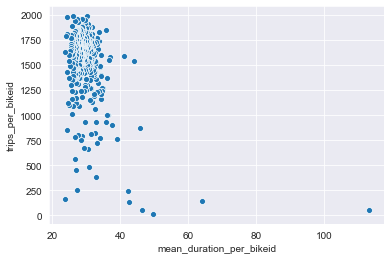

In [52]:
ax = sns.scatterplot(x = 'mean_duration_per_bikeid', y= 'trips_per_bikeid', data = bikeid_details)

To find a relationship between number of trips taken by bikeid and mean duration of the trips, I need to remove the outliers (where trip duration >40 minutes)

In [53]:
trips_combined = trips_combined[trips_combined['duration_minutes']<40]

In [54]:
bikeid_details_below40m = trips_combined.groupby("bikeid").agg(
    trips_per_bikeid=pd.NamedAgg(column="trip_id", aggfunc="count"),
    max_duration_per_bikeid=pd.NamedAgg(column="duration_minutes", aggfunc="max"),
    mean_duration_per_bikeid=pd.NamedAgg(column="duration_minutes", aggfunc="mean"))
bikeid_details_below40m = bikeid_details_below40m.sort_values(by=['mean_duration_per_bikeid'], ascending=False)
bikeid_details_below40m.head()

,trips_per_bikeid,max_duration_per_bikeid,mean_duration_per_bikeid
bikeid,,,
2147.0,173,39,15.023121
68.0,1288,39,14.936335
589.0,1020,39,14.910784
439.0,667,39,14.881559
370.0,1443,39,14.838531


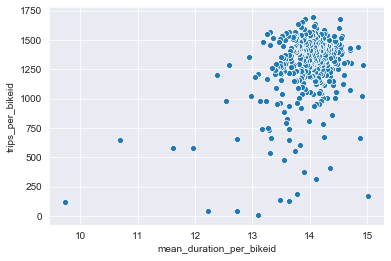

In [55]:
ax = sns.scatterplot(x = 'mean_duration_per_bikeid', y= 'trips_per_bikeid', data = bikeid_details_below40m)

From here, we are able to see that majority of the trip took a mean duration of 13 - 15 minutes

In [56]:
trips_combined.head()

,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt,start_location_status,start_location_station_id,end_location_status,end_location_station_id
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10,active,2494,active,2570.0
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3,active,2538,active,2498.0
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4,active,2707,active,3377.0
5,861.0,29,West & 6th St.,17th & Guadalupe,Local30,9900153369,2015-05-29 15:12:00,2015,5,active,2540,active,2537.0
6,382.0,17,Riverside @ S. Lamar,Palmer Auditorium,Walk Up,11114967,2016-07-26 12:24:16,2016,7,active,2567,active,2575.0


In [60]:
trips_combined.dtypes

bikeid                               object
duration_minutes                      int64
end_station_name                     object
start_station_name                   object
subscriber_type                      object
trip_id                              object
start_datetime               datetime64[ns]
year_dt                               int64
month_dt                              int64
start_location_status                object
start_location_station_id            object
end_location_status                  object
end_location_station_id              object
dtype: object

Plotting trips per year

In [86]:
# Finding details per year
year_details = trips_combined.groupby("year_dt").agg(
    trips_per_year=pd.NamedAgg(column="trip_id", aggfunc="count"),
    mean_duration_per_year=pd.NamedAgg(column="duration_minutes", aggfunc="mean"),
    bikes_per_year=pd.NamedAgg(column="bikeid", aggfunc="nunique"),
    stations_per_year=pd.NamedAgg(column="start_station_name", aggfunc="nunique"))
year_details = year_details.sort_values(by=['trips_per_year'], ascending=False)
year_details.head()

,trips_per_year,mean_duration_per_year,bikes_per_year,stations_per_year
year_dt,,,,
2016,156677,14.145286,396,57
2015,153638,13.715897,392,53
2014,121705,14.031708,375,46
2017,91622,14.060597,384,57
2013,1040,15.281731,82,11


[Text(0.5, 1.0, 'Total number of trips per year')]

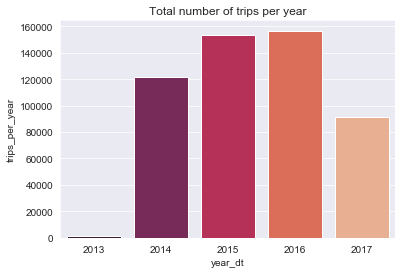

In [89]:
sns.barplot(x=year_details.index, y='trips_per_year', 
            data=year_details, palette="rocket").set(title='Total number of trips per year')

[Text(0.5, 1.0, 'Total number of bikes used per year')]

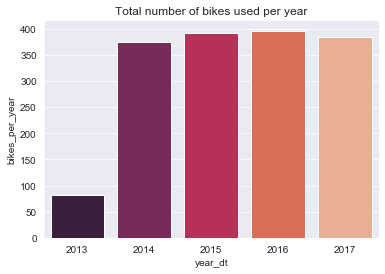

In [90]:
sns.barplot(x=year_details.index, y='bikes_per_year', 
            data=year_details, palette="rocket").set(title='Total number of bikes used per year')

[Text(0.5, 1.0, 'Total number of stations per year')]

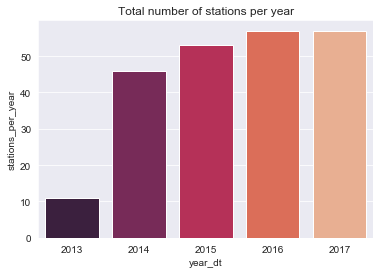

In [91]:
sns.barplot(x=year_details.index, y='stations_per_year', 
            data=year_details, palette="rocket").set(title='Total number of stations per year')

Observations from the above 3 graphs:
- The total trips per year demonstrated an increasing trend from 2014 to 2016, followed by a sharp decrease in 2017.
- The total number of bikes increased in numbers from 2014 to 2016 by a small margin, however also dropped in number in 2017. 
- The total number of stations too continually increased from 2014 to 2017. 

From the above observations, I am able to deduce that increasing the number of bikes, hence their availability will significantly increase their usage compared to other factors such as increasing the number of stations.

Plotting trips per subscription type

In [98]:
# Finding details per subscriber
subscr_details = trips_combined.groupby("subscriber_type").agg(
    trips_per_subscr=pd.NamedAgg(column="trip_id", aggfunc="count"),
    mean_duration_per_subscr=pd.NamedAgg(column="duration_minutes", aggfunc="mean"),
    bikes_per_subscr=pd.NamedAgg(column="bikeid", aggfunc="nunique"),
    stations_per_subscr=pd.NamedAgg(column="start_station_name", aggfunc="nunique"))
subscr_details = subscr_details.sort_values(by=['trips_per_subscr'], ascending=False)[:5]
subscr_details

,trips_per_subscr,mean_duration_per_subscr,bikes_per_subscr,stations_per_subscr
subscriber_type,,,,
Walk Up,202930,17.762189,405,67
Local365,123476,8.865504,404,67
24-Hour Kiosk (Austin B-cycle),78258,16.542028,375,46
Local30,35597,10.102930,402,67
Annual Membership (Austin B-cycle),28696,8.479440,374,46


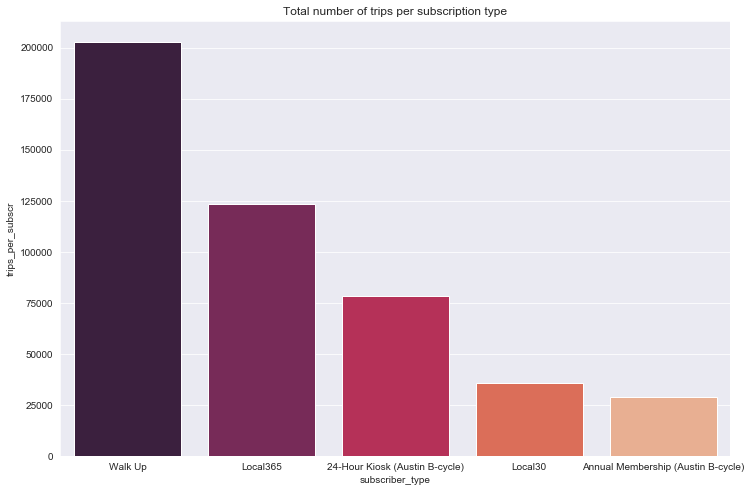

In [104]:
sns.barplot(x=subscr_details.index, y='trips_per_subscr', 
            data=subscr_details, palette="rocket").set(title='Total number of trips per subscription type')
plt.gcf().set_size_inches(12, 8)

Details of the top 2 membership type: 

Walk up seems to be the current "Pay-as-you-ride" membership
- Single-use pass
- Unlock fee + $.23/minute
- To stop the clock, dock

Local365
- Annual membership includes the first 60 minutes of each trip
- Trips lasting longer than 60 minutes will accrue usage fees
- Membership renew on an annual basis
- To reset the clock, doc

Finding further details of the 2 membership types

In [113]:
trips_combined_top2subscr = trips_combined.loc[(trips_combined['subscriber_type']=='Walk Up') | (trips_combined['subscriber_type']=='Local365')]
trips_combined_top2subscr.shape

(326406, 13)

In [119]:
startloc_details = trips_combined_top2subscr.groupby("start_station_name").agg(
    trips_per_station=pd.NamedAgg(column="trip_id", aggfunc="count"),
    bikes_per_station=pd.NamedAgg(column="bikeid", aggfunc="nunique"))
startloc_details = startloc_details.sort_values(by=['trips_per_station'], ascending=False)[:5]
startloc_details.head()

,trips_per_station,bikes_per_station
start_station_name,,
Riverside @ S. Lamar,14240,403
City Hall / Lavaca & 2nd,14114,404
5th & Bowie,13952,404
2nd & Congress,13291,404
Rainey St @ Cummings,13014,404


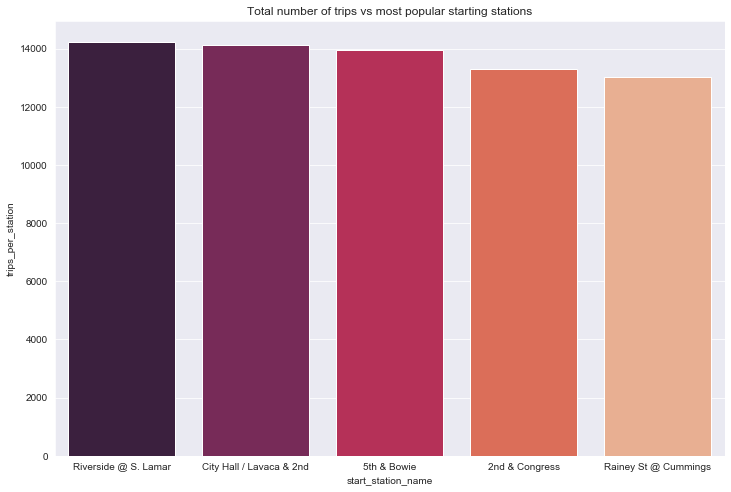

In [124]:
sns.barplot(x=startloc_details.index, y='trips_per_station', 
            data=startloc_details, palette="rocket").set(title='Total number of trips vs most popular starting stations')
plt.gcf().set_size_inches(12, 8)

In [125]:
endloc_details = trips_combined_top2subscr.groupby("end_station_name").agg(
    trips_per_station=pd.NamedAgg(column="trip_id", aggfunc="count"),
    bikes_per_station=pd.NamedAgg(column="bikeid", aggfunc="nunique"))
endloc_details = endloc_details.sort_values(by=['trips_per_station'], ascending=False)[:5]
endloc_details.head()

,trips_per_station,bikes_per_station
end_station_name,,
City Hall / Lavaca & 2nd,16756,404
2nd & Congress,14521,404
4th & Congress,14144,404
Riverside @ S. Lamar,13238,403
5th & Bowie,12522,405


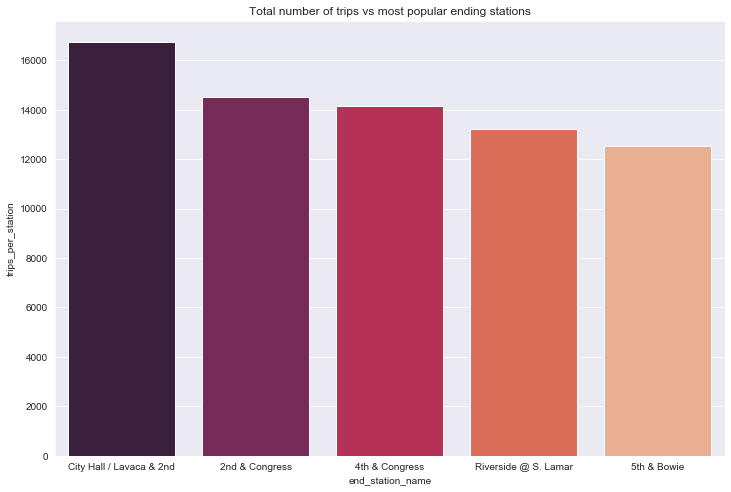

In [126]:
sns.barplot(x=endloc_details.index, y='trips_per_station', 
            data=endloc_details, palette="rocket").set(title='Total number of trips vs most popular ending stations')
plt.gcf().set_size_inches(12, 8)

In [127]:
trips_combined_top2subscr.head()

,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt,start_location_status,start_location_station_id,end_location_status,end_location_station_id
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10,active,2494,active,2570.0
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3,active,2538,active,2498.0
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4,active,2707,active,3377.0
6,382.0,17,Riverside @ S. Lamar,Palmer Auditorium,Walk Up,11114967,2016-07-26 12:24:16,2016,7,active,2567,active,2575.0
9,668.0,20,MoPac Pedestrian Bridge @ Veterans Drive,Riverside @ S. Lamar,Walk Up,15339050,2017-07-08 12:27:28,2017,7,active,2575,active,3377.0


In [136]:
trips_combined_top2subscr["hour_start"] = trips_combined_top2subscr["start_datetime"].dt.round("H").dt.time
trips_combined_top2subscr.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt,start_location_status,start_location_station_id,end_location_status,end_location_station_id,start_time,hour_start
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10,active,2494,active,2570.0,02:06:04,02:00:00
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3,active,2538,active,2498.0,16:28:27,16:00:00
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4,active,2707,active,3377.0,15:39:13,16:00:00
6,382.0,17,Riverside @ S. Lamar,Palmer Auditorium,Walk Up,11114967,2016-07-26 12:24:16,2016,7,active,2567,active,2575.0,12:24:16,12:00:00
9,668.0,20,MoPac Pedestrian Bridge @ Veterans Drive,Riverside @ S. Lamar,Walk Up,15339050,2017-07-08 12:27:28,2017,7,active,2575,active,3377.0,12:27:28,12:00:00


In [141]:
hour_details = trips_combined_top2subscr.groupby("hour_start").agg(
    trips_per_hour=pd.NamedAgg(column="trip_id", aggfunc="count"),
    bikes_per_hour=pd.NamedAgg(column="bikeid", aggfunc="nunique"))
hour_details = hour_details.sort_values(by=['trips_per_hour'], ascending=False)[:12]
hour_details

,trips_per_hour,bikes_per_hour
hour_start,,
17:00:00,30035,404
16:00:00,28325,404
15:00:00,27867,404
14:00:00,27149,404
13:00:00,27005,404
18:00:00,26801,404
12:00:00,24016,405
19:00:00,19834,404
11:00:00,18373,404


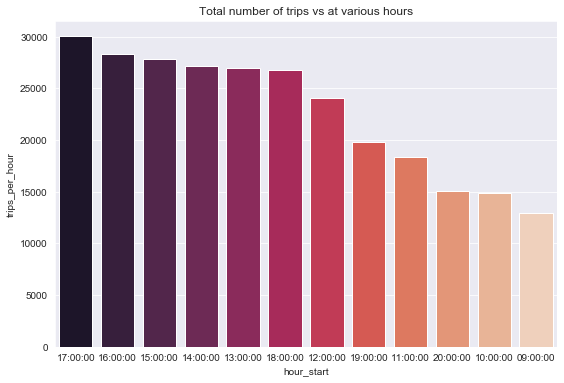

In [143]:
sns.barplot(x=hour_details.index, y='trips_per_hour', 
            data=hour_details, palette="rocket").set(title='Total number of trips vs at various hours')
plt.gcf().set_size_inches(9, 6)

Most travels from the top 2 subscription type were in between these locations & timings. 

The locations are all areas dotted with mixed-use developments, small businesses and tons of human traffic. There is no doubt that have a high bike usage percentage. Coupled with the timing of the bike usage, these trips would mostly be people traveling from home to work and back. 
- Given this type of frequent usage and the popularity of the Local365 membership, more efforts could be funneled into converting Pay-as-you-use users to Annual membership users at these locations.

In [144]:
trips_combined_top2subscr["date_dt"] = trips_combined_top2subscr["start_datetime"].dt.date
trips_combined_top2subscr.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bikeid,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,start_datetime,year_dt,month_dt,start_location_status,start_location_station_id,end_location_status,end_location_station_id,start_time,hour_start,date_dt
1,141.0,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,2016,10,active,2494,active,2570.0,02:06:04,02:00:00,2016-10-30
2,578.0,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,2016,3,active,2538,active,2498.0,16:28:27,16:00:00,2016-03-11
4,86.0,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,2017,4,active,2707,active,3377.0,15:39:13,16:00:00,2017-04-16
6,382.0,17,Riverside @ S. Lamar,Palmer Auditorium,Walk Up,11114967,2016-07-26 12:24:16,2016,7,active,2567,active,2575.0,12:24:16,12:00:00,2016-07-26
9,668.0,20,MoPac Pedestrian Bridge @ Veterans Drive,Riverside @ S. Lamar,Walk Up,15339050,2017-07-08 12:27:28,2017,7,active,2575,active,3377.0,12:27:28,12:00:00,2017-07-08
